In [32]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,SGDRegressor
from sklearn.preprocessing import PolynomialFeatures,StandardScaler
from sklearn.metrics import r2_score
from sklearn.pipeline import Pipeline

In [34]:
x = 6*np.random.rand(200,1)-3
y = 0.8*x**2+0.9*x+2+np.random.randn(200,1)

# y = 0.8x^2v+ 0.9x + 2

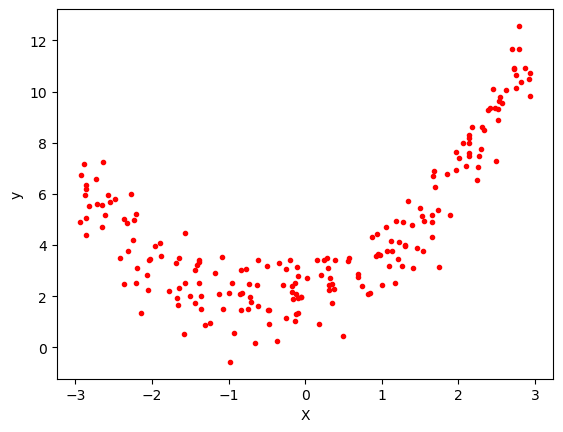

In [20]:
plt.plot(x,y,'r.')
plt.xlabel("X")
plt.ylabel("y")
plt.show()

In [38]:
# Train test split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2)

In [40]:
#Applying Linear Regression 
lr = LinearRegression()

In [42]:
lr.fit(x_train,y_train)

LinearRegression()

In [46]:
y_pred = lr.predict(x_test)
r2_score(y_test,y_pred)

0.35112358475044647

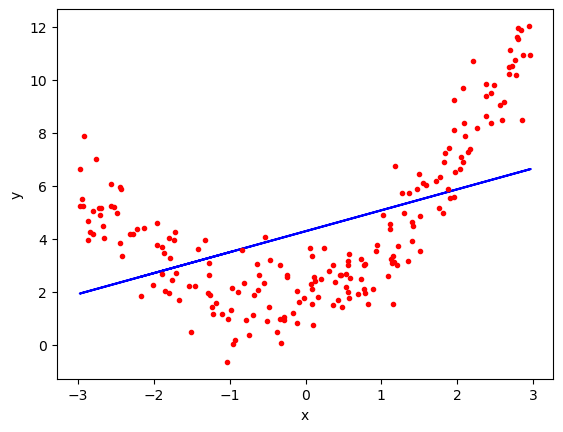

In [48]:
plt.plot(x_train,lr.predict(x_train),color = "b")
plt.plot(x,y,"r.")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

In [50]:
# Apllying Polynomial Linear Regression
# degree 2
poly = PolynomialFeatures(degree=3,include_bias=True)
x_train_trans = poly.fit_transform(x_train)
x_test_trans = poly.fit_transform(x_test)

In [56]:
x_train_trans.shape
x_train.shape

(160, 1)

In [54]:
print(x_train[0])
print(x_train_trans[0])

[-2.16450146]
[  1.          -2.16450146   4.68506659 -10.14083348]


In [58]:
lr = LinearRegression()
lr.fit(x_train_trans,y_train)

LinearRegression()

In [60]:
y_pred = lr.predict(x_test_trans)

In [62]:
r2_score(y_test,y_pred)

0.9007222702385175

In [64]:
x_new = np.linspace(-3,3,200).reshape(200,1)
x_new_poly = poly.transform(x_new)
y_new = lr.predict(x_new_poly)

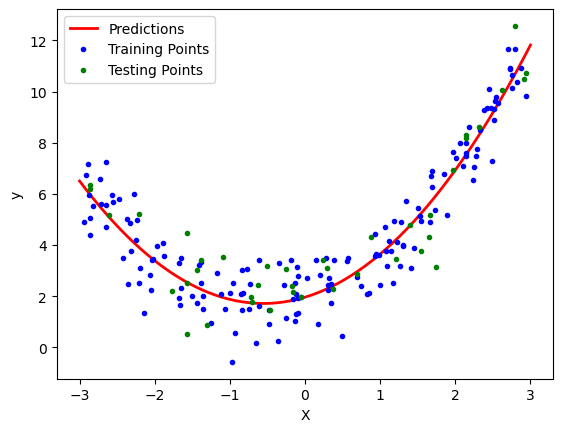

In [68]:
plt.plot(x_new,y_new,"r-",linewidth = 2,label = "Predictions")
plt.plot(x_train,y_train,"b.",label = "Training Points")
plt.plot(x_test,y_test,"g.",label = "Testing Points")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

In [66]:
def polynomial_regression(degree):
    x_new = np.linspace(-3,3,100).reshape(100,1)
    x_new_poly = poly.transform(x_new)

    polybig_features = PolynomialFeatures(degree=degree,include_bias=False)
    std_scaler = StandardScaler()
    lin_reg = LinearRegression()
    polynomial_regression = Pipeline([
        ("poly_features",polybig_features),
        ("std_scaler",std_scaler),
        ("lin_reg",lin_reg),
    ])
    polynomial_regression.fit(x,y)
    y_newbig = polynomial_regression.predict(x_new)
    plt.plot(x_new, y_newbig,'r', label="Degree " + str(degree), linewidth=2)

    plt.plot(x_train, y_train, "b.", linewidth=3)
    plt.plot(x_test, y_test, "g.", linewidth=3)
    plt.legend(loc="upper left")
    plt.xlabel("X")
    plt.ylabel("y")
    plt.axis([-3, 3, 0, 10])
    plt.show()
    

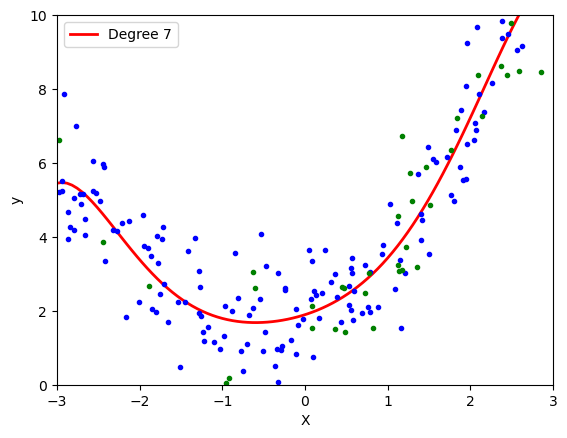

In [72]:
polynomial_regression(7)

In [92]:
poly.powers_

array([[0],
       [1],
       [2]], dtype=int64)

C:\Users\Khan2\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


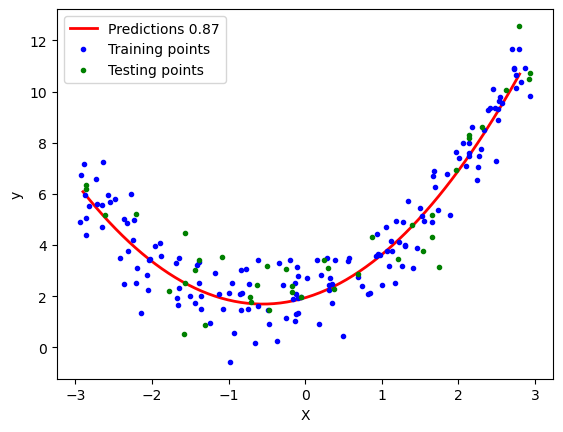

In [94]:
# Applying Gradient Descent

poly = PolynomialFeatures(degree=2)

X_train_trans = poly.fit_transform(x_train)
X_test_trans = poly.transform(x_test)

sgd = SGDRegressor(max_iter=100)
sgd.fit(X_train_trans,y_train)

X_new=np.linspace(-2.9, 2.8, 200).reshape(200, 1)
X_new_poly = poly.transform(X_new)
y_new = sgd.predict(X_new_poly)

y_pred = sgd.predict(X_test_trans)

plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions " + str(round(r2_score(y_test,y_pred),2)))
plt.plot(x_train, y_train, "b.",label='Training points')
plt.plot(x_test, y_test, "g.",label='Testing points')
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

# Fuel Consumption Polynomial regression

In [6]:
import pandas as pd
import matplotlib.pyplot as plt


In [28]:
df = pd.read_csv('FuelConsumption (1).csv')

In [26]:
df.head()

,Year,MAKE,MODEL,VEHICLE CLASS,ENGINE SIZE,CYLINDERS,TRANSMISSION,FUEL,FUEL CONSUMPTION,COEMISSIONS
0,2000,ACURA,1.6EL,COMPACT,1.6,4,A4,X,10.5,216
1,2000,ACURA,1.6EL,COMPACT,1.6,4,M5,X,9.8,205
2,2000,ACURA,3.2TL,MID-SIZE,3.2,6,AS5,Z,13.7,265
3,2000,ACURA,3.5RL,MID-SIZE,3.5,6,A4,Z,15.0,301
4,2000,ACURA,INTEGRA,SUBCOMPACT,1.8,4,A4,X,11.4,230


In [92]:
data = df[['COEMISSIONS ','FUEL CONSUMPTION']]

In [94]:
data

,COEMISSIONS,FUEL CONSUMPTION
0,216,10.5
1,205,9.8
2,265,13.7
3,301,15.0
4,230,11.4
...,...,...
634,288,14.4
635,274,13.6
636,274,13.9
637,260,13.0
